<a href="https://colab.research.google.com/github/elifberkman/hugging-face-test/blob/master/build_ml_with_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Machine Learning GUIs with Gradio

In [5]:
def mount_path(path):
  from google.colab import drive

  DRIVE_PATH = path
  mount='/content/drive/'
  drive.mount(mount)
  drive_root = mount + DRIVE_PATH

  %cd $drive_root

In [6]:
# Change working directory if working in COLAB
try:
  from google.colab import drive
  IN_COLAB=True
  print("We're running Colab")
  mount_path("MyDrive/Colab Notebooks/udemy-courses/learn-huggingface-bootcamp")
except:
  IN_COLAB=False

We're running Colab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/udemy-courses/learn-huggingface-bootcamp


In [7]:
!pwd

/content/drive/MyDrive/Colab Notebooks/udemy-courses/learn-huggingface-bootcamp


In [8]:
!pip install gradio

## Introduction to Gradio

- Gradio is an easy to use open-source library (now owned by Hugging Face) that allows users to quickly and easily create GUIs using only Python code.

- Components (Numbers, Images, ... - Same input/output) -> Interface Layout
- Custom Python Code

## Gradio Components
- One of the key aspects of Gradio is the use of **components**.
- This allows us to easily build out GUIs with just a few lines of code!

In [9]:
import gradio as gr
gr.__version__

'4.39.0'

In [ ]:
def add_numbers(x, y):
  return x + y

In [ ]:
import gradio as gr

iface = gr.Interface(fn=add_numbers,
                     inputs=[gr.Number(10, info="Enter a number"), gr.Number(10, info="Enter a number")],
                     outputs=gr.Number(info="Result"))
iface.launch()

- Most common components used in Gradio Interfaces:
  - Text
  - Slider
  - Image
  - Dropdown
  - JSON
  - Label

https://www.gradio.app/docs/gradio/introduction

In [ ]:
def reverse_text(input_text):
  return input_text[::-1]

In [ ]:
reverse_text('hello')

'olleh'

In [ ]:
iface = gr.Interface(fn=reverse_text,
                     inputs=gr.Textbox(lines=2, placeholder="Enter some text here..."),
                     outputs=gr.Textbox(lines=2))
iface.launch()

In [ ]:
def slider_example(value):
  return f"Slider current values is: {value}"

In [ ]:
iface = gr.Interface(fn=slider_example,
                     inputs=gr.Slider(minimum=0, maximum=100, step=2),
                     outputs=gr.Text())
iface.launch()

In [ ]:
def dropdown_example(value):
  return f"Current values is: {value}"

In [ ]:
options = ['A', 'B', 'C']
iface = gr.Interface(fn=dropdown_example,
                     inputs=gr.Dropdown(options),
                     outputs=gr.Text())
iface.launch()

In [ ]:
help(gr.Dropdown)

In [10]:
from PIL import Image

def convert(image_path):
  image = Image.open(image_path)
  return image.convert("L")

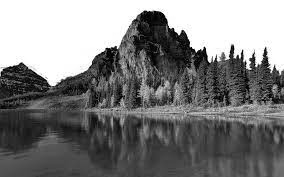

In [25]:
convert("image.jpeg")

In [ ]:
iface = gr.Interface(fn=convert,
                     inputs=gr.Image(type="filepath"),
                     outputs=gr.Image())
iface.launch()

In [29]:
def number_details(number):
  details = {
      "original": number,
      "squared": number ** 2,
      "sqrt": number ** 0.5,
      "is_even": number % 2 == 0
  }
  return details

In [ ]:
iface = gr.Interface(fn=number_details,
                     inputs=gr.Number(label="Number"),
                     outputs=gr.JSON())
iface.launch()

In [32]:
def classify_number(number):
  if number > 0:
    return "positive"
  elif number < 0:
    return "negative"
  else:
    return "zero"

In [ ]:
iface = gr.Interface(fn=classify_number,
                     inputs=gr.Number(label="Number"),
                     outputs=gr.Label())
iface.launch()

## Gradio Multiple Components and Layouts

- Gradio allows us to organize components using a **Block** layout and adding **Rows** and **Columns** of **components**.
- We can then further expand on this by adding **Tabs** and **Accordions**.

- It's common practice to only use Rows or only use Columns, rather than worrying about mixing both, but other developers prefer the full control, others just prefer sticking with gr.Interface().

In [ ]:
with gr.Blocks() as demo:
  with gr.Tab('Tab one'):

    with gr.Row():
      with gr.Column(scale=2):
        text1 = gr.Text(value="Row 0 Col 0 - Comp 1")
        text2 = gr.Text(value="Row 0 Col 0 - Comp 2")

      with gr.Column(scale=1):
        text3 = gr.Text(value="Row 0 Col 1")

    with gr.Row():
      text3 = gr.Text(value="Bottom row")

  with gr.Tab('Tab two'):
    with gr.Row():
      gr.Text(value="Welcome to new tab")

demo.launch()

In [ ]:
with gr.Blocks() as demo:
  gr.Label("Label Here")
  with gr.Accordion("Accordion here", open=False):
    gr.Image()

demo.launch()

In [ ]:
with gr.Blocks() as demo:
  with gr.Group():
    gr.Button('Button Comp One')
    gr.Button('Button Comp Two')
    gr.Image()

  gr.Image()

demo.launch()

In [ ]:
with gr.Blocks() as demo:
  with gr.Row():
    gr.Image(height=900, width=20) # Row effect - width doesn't have any effect

demo.launch()

In [ ]:
css = """
.your-class {
  height: 1000px;
  background-color: blue;
}
"""

with gr.Blocks(css=css) as demo:
  with gr.Row(elem_classes=['your-class']):
    gr.Image()

demo.launch()

## Gradio Component Interactions

**Interactions**
- **gr.Interface** can automatically set-up layouts and interactions for us, but when we create our own layouts, we need to manually create the interface, which consists of
  - "Prediction" function
  - Inputs
  - Outputs
- This interface allows for interactions between input components, custom Python code or models, and output components.
- Typically, these interactions are triggered by a click (e.g. submit button) or by any change (e.g. an event listener waiting for any change in value, such as moving a slider.

```
# FUNCTION

# INPUTS

# OUTPUTS

# CLICK or CHANGE
# INTERFACE --> fn, inputs, outputs
# gr.Interface()
```

In [57]:
# FUNCTION
def multiply(x, y):
  return x*y

In [ ]:
# computationally expensive
with gr.Blocks() as app:
  with gr.Row():
    x_slider = gr.Slider(label='X')
    y_slider = gr.Slider(label='Y')
  with gr.Row():
    result = gr.Text()

  x_slider.change(fn=multiply, inputs=[x_slider, y_slider], outputs=result)
  y_slider.change(fn=multiply, inputs=[x_slider, y_slider], outputs=result)

app.launch()

In [ ]:
# better with buttons
with gr.Blocks() as app:

  with gr.Row():
    x_slider = gr.Slider(label='X')
    y_slider = gr.Slider(label='Y')

  with gr.Row():
    result = gr.Text()

  with gr.Row():
    multiply_button = gr.Button('Multiply')

  multiply_button.click(fn=multiply, inputs=[x_slider, y_slider], outputs=result)


app.launch()

In [62]:
from PIL import Image

def make_grayscale(image_path):
  image = Image.open(image_path)
  image_grayscale = image.convert("L")

  return image_grayscale, "Image converted"

In [64]:
image, log = make_grayscale("image.jpeg")

In [ ]:
with gr.Blocks() as demo:
  with gr.Row():
    input_image = gr.Image(type="filepath")
    output_image = gr.Image()
  with gr.Row():
    log = gr.Textbox()
    submit = gr.Button(value='Convert to grayscale')

  submit.click(fn=make_grayscale, inputs=input_image, outputs=[output_image, log])

demo.launch()

In [68]:
class Operations():
  def __init__(self):
    print("Operation methods are ready!")

  def multiply(self, x, y):
    return x*y

  def add(self, x, y):
    return x+y

In [69]:
operations_obj = Operations()

Operation methods are ready!


In [ ]:
with gr.Blocks() as demo:
  with gr.Row():
    x_slider = gr.Slider(label='X')
    y_slider = gr.Slider(label='Y')
  with gr.Row():
    result_of_add = gr.Text()
    result_of_multiply = gr.Text()
  with gr.Row():
    button_add = gr.Button('Add')
    button_mul = gr.Button('Multiply')

  button_mul.click(fn=operations_obj.multiply, inputs=[x_slider, y_slider], outputs=result_of_multiply)
  button_add.click(fn=operations_obj.add, inputs=[x_slider, y_slider], outputs=result_of_add)

demo.launch()

## Gradio Machine Learning GUI Example - ML Integration

In [71]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("microsoft/resnet-18")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-18")

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.5k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [72]:
def classify_image(image):
  # processing image
  image = processor(images=image, return_tensors='pt')['pixel_values']
  # passing the image to the model --> Logits 0-1000 0.8 cat
  logits = model(image).logits
  # grab the index of the higgest probability
  predicted_label = logits.argmax(-1).item()

  return model.config.id2label[predicted_label]

In [ ]:
iface = gr.Interface(fn=classify_image, inputs=gr.Image(), outputs=gr.Label(), title="RES NET 18", description="upload an image")
iface.launch()

## Gradio Pipelines Integration

- Two more related topics:
  - Loading a pipeline with a local model
  - Using gr.load() to attach a gradio interface to an existing HF Model or Space

- Gradio Load contructs a demo from a Hugging Face repo.
- It can accept model repos (if src is "models") or Space repos (if src is "spaces").
- The input and output components are automatically loaded from the repo.

In [74]:
from transformers import pipeline

In [75]:
sentiment_analysis = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [76]:
sentiment_analysis("I am sad!")

[{'label': 'NEGATIVE', 'score': 0.9990791082382202}]

In [79]:
def predict_sentiment(text):
  result = sentiment_analysis(text)
  return result[0]['label'], result[0]['score']

In [80]:
predict_sentiment('I am happy!')

('POSITIVE', 0.999873161315918)

In [ ]:
iface = gr.Interface(fn=predict_sentiment,
                     inputs=gr.Textbox(lines=2, placeholder="Enter some text here..."),
                     outputs=[gr.Label(label='sentiment'), gr.Number(label='score')])
iface.launch()

In [ ]:
demo = gr.load("distilbert/distilbert-base-uncased-finetuned-sst-2-english", src="models")
demo.launch()

## Gradio Errors, Warnings, and Info

- Since GUIs are inherently user-facing, that means the potential for errors, warnings, or information that the user needs to be made aware of.
- Gradio makes this easy to integrate into our graphical interfaces.

In [104]:
def add_even(a, b):
  if not validate_even(a):
    # raise gr.Error("A is not even")
    # gr.Warning("A is not even")
    gr.Info("A is not even")
  if not validate_even(b):
    # raise gr.Error("B is not even")
    # gr.Warning("B is not even")
    gr.Info("B is not even")

  return a+b

In [100]:
def validate_even(num):
  return num%2 == 0

In [101]:
validate_even(11)

False

In [102]:
# ERROR --> STOP EXECUTION --> TERMINATE

In [ ]:
iface = gr.Interface(fn=add_even,
                     inputs=[gr.Number(label='A'), gr.Number(label='B')],
                     outputs=gr.Number()
                     )
iface.launch()

## Gradio Styling and Themes

- While Gradio does allow you to completely customize the CSS of your GUIs, you should keep in mind that there are many CSS variables used in Gradio styling, so often it is easier to just use a prebuilt theme for Gradio, or you can use the Theme Builder tool to graphically create your own theme creation.

In [ ]:
help(gr.themes)

In [108]:
def echo(num):
  return num

In [ ]:
iface = gr.Interface(
    fn=echo,
    inputs=gr.Number(),
    outputs=gr.Number(),
    theme=gr.themes.Soft()  # Glass, Soft
    )

iface.launch()

In [ ]:
with gr.Blocks(theme=gr.themes.Soft()) as demo:
  gr.Markdown("# Themes in Gradio")
  with gr.Row():
    gr.Number()

demo.launch()

In [ ]:
gr.themes.builder()